In [58]:
import os
import struct

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

filename = '../../build/app/read_data_bin/data.bin'

In [59]:
with open(filename, 'rb') as fb:
    packet = []
    while len(b_count := fb.read(8)) == 8:
        b_count = fb.read(8)
        count, = struct.unpack('N', b_count)
        print(count)

        try:
            for _ in range(count):
                b_point = fb.read(8)
                angle, dist_mm, quality, flag = struct.unpack('=HIBB', b_point)
                angle = angle * 90 / 16384
                dist_m = dist_mm / 4 / 1000
                packet.append((angle, dist_m))
        except:
            break

197032483725246506


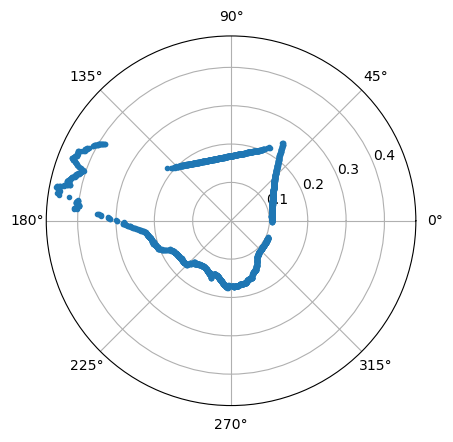

In [60]:
t = np.deg2rad([p[0] for p in packet if p[1] != 0])
d = [p[1] for p in packet if p[1] != 0]
# plt.polar(t, d, '.-')
plt.polar(t, d, '.')